# Buisness Case:- Detecting the type of skin disoder


##### Aim Of Project:
    Analyzing the data and  Give suggestions for doctors on how to spot the patient's skin conditions as soon as possible.

### Data Information
This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology.

They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well.

Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.The names and id numbers of the patients were recently removed from the database.

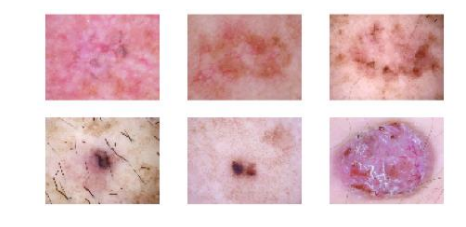

 ## Importing libraries

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVC
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier

In [3]:
# It will show the every column 

pd.set_option('display.max_row', None)
sns.set_style("darkgrid")

### Loading the Dataset

In [4]:
# Here, We are loading the dataset by using the pandas

df=pd.read_csv(r"C:\Users\nithi\Desktop\Datamites project\Skin Disorder\PRCP-1028-Skin-Disorder-Prediction-20220512T101734Z-001\PRCP-1028-Skin-Disorder-Prediction\dataset_35_dermatology (1).csv")
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


## DOMAIN ANALYSIS

<ol>
<li> In the dataset the class is the target column 
<li> In the age column the is some special charecters 
<li> There is 34 feature and 1 target column
<li> In this features we want to remove the less important features

## Basic Checks

In [5]:
# Displaying the first 4 rows of the dataset using the 'head()' function where 4 is given as a parameter

df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [6]:
# Displaying the last 4 rows of the dataset using the 'tail()' function where 4 is given as a parameter

df.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35,1


In [7]:
# Printing all the column from the dataframe

df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [8]:
# Printing the number of rows and columns using thr "shape()" function

df.shape

(366, 35)

- we have totally 366 rows and 35 columns

In [9]:
# Quick summary about the data

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [10]:
# Checking for null values

df.isnull().sum() 

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

- There is no null value in the dataset

In [11]:
# It will discribe all the characters

df.describe(include=['O'])

,Age
count,366
unique,61
top,40
freq,17


In [12]:
# checking for the duplicated values

df.loc[df.duplicated()].head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class


- There are no duplicated values in the data

In [13]:
# It will give every unique value in the Age column

df['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [14]:
# checking the number of age has '?'

df.loc[df['Age'] == '?'] 

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [15]:
df.loc[df['Age'] == '?',"Age"]=np.nan

In [16]:
df[(df['Age'] == '?') | (df["Age"].isna())]

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,NaN,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,NaN,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,NaN,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,NaN,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,NaN,5


In [17]:
# Removing the columns where the age==?

df.drop(axis=1,index=[33,34,35,36,262,263,264,265],inplace=True)

In [18]:
# Checking the age dtpye
df.Age.dtype

dtype('O')

In [19]:
# Changeing Datatype of AGE feature

df['Age']=df['Age'].astype('int64')

In [20]:
# Rechecking Values

df['Age'].unique()

array([55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 10, 65, 38, 23, 17,
       51, 42, 44, 33, 43, 50, 34, 15, 46, 62, 35, 48, 12, 52, 60, 32, 19,
       29, 25, 36, 13, 27, 31, 28, 64, 39, 47, 16,  0,  7, 70, 37, 61, 67,
       56, 53, 24, 58, 49, 63, 68,  9, 75], dtype=int64)

In [21]:
# we can see here that the dtype of is in object

df.dtypes

erythema                                    int64
scaling                                     int64
definite_borders                            int64
itching                                     int64
koebner_phenomenon                          int64
polygonal_papules                           int64
follicular_papules                          int64
oral_mucosal_involvement                    int64
knee_and_elbow_involvement                  int64
scalp_involvement                           int64
family_history                              int64
melanin_incontinence                        int64
eosinophils_in_the_infiltrate               int64
PNL_infiltrate                              int64
fibrosis_of_the_papillary_dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing_of_the_rete_ridges                 int64


In [22]:
# dtype of age is changed into int64

df.dtypes

erythema                                    int64
scaling                                     int64
definite_borders                            int64
itching                                     int64
koebner_phenomenon                          int64
polygonal_papules                           int64
follicular_papules                          int64
oral_mucosal_involvement                    int64
knee_and_elbow_involvement                  int64
scalp_involvement                           int64
family_history                              int64
melanin_incontinence                        int64
eosinophils_in_the_infiltrate               int64
PNL_infiltrate                              int64
fibrosis_of_the_papillary_dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing_of_the_rete_ridges                 int64


In [23]:
df.describe()

# Status of the dataset

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,...,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.449721,0.170391,0.379888,0.622905,0.530726,...,0.474860,0.460894,0.949721,0.458101,0.106145,0.117318,1.877095,0.558659,36.296089,2.782123
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.956468,0.576394,0.837388,0.990278,0.912352,...,0.871705,0.959914,1.129060,0.959796,0.455180,0.493863,0.699324,1.107990,15.324557,1.593936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


# Exploratory Data Analysis

In [24]:
# checking the value counts of the class

df['class'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

- There are 6 types of class

In [25]:
sns.set_style("darkgrid")

<Figure size 720x360 with 0 Axes>

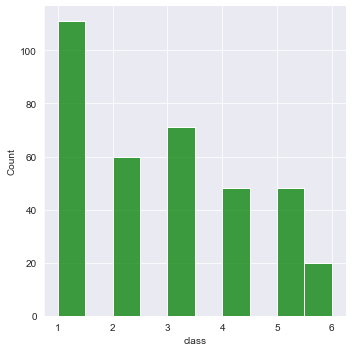

In [26]:
# Using the distplot to count  the number patients presented in the each class

# Setting up the figure size
plt.figure(figsize=(10,5))

# Setting value for the bar graph
sns.displot(df['class'],color='green')

plt.show()

- The highest number of patients are presented in class-1

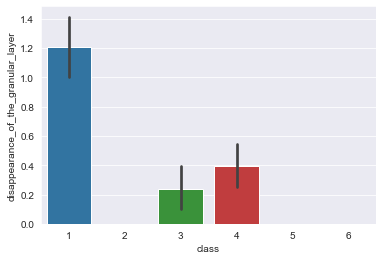

In [27]:
# Using the barplot to see number of disappearance_of_the_granular_layer patients present in the each class

sns.barplot(x='class',y='disappearance_of_the_granular_layer',data=df)
plt.show()

- The people are affected by disappearance_of_the_granular_layer are presented in class1,2 and 3

<AxesSubplot:xlabel='class', ylabel='vacuolisation_and_damage_of_basal_layer'>

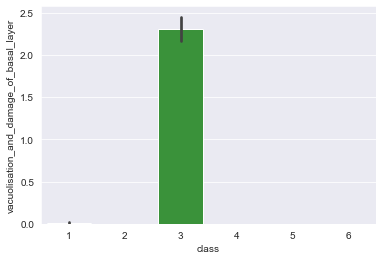

In [28]:
# Using the barplot to see number of vacuolisation_and_damage_of_basal_layer patients present in the each class

sns.barplot(x='class',y='vacuolisation_and_damage_of_basal_layer',data=df)

- The people are affected by vacuolisation_and_damage_of_basal_layer is presented by only in class 3

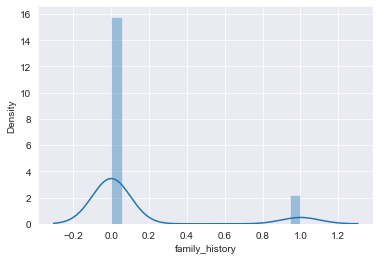

In [29]:
# Using the distplot to see the distripution of the family history

sns.distplot(df['family_history'])
plt.show()

- It will show the count of family history

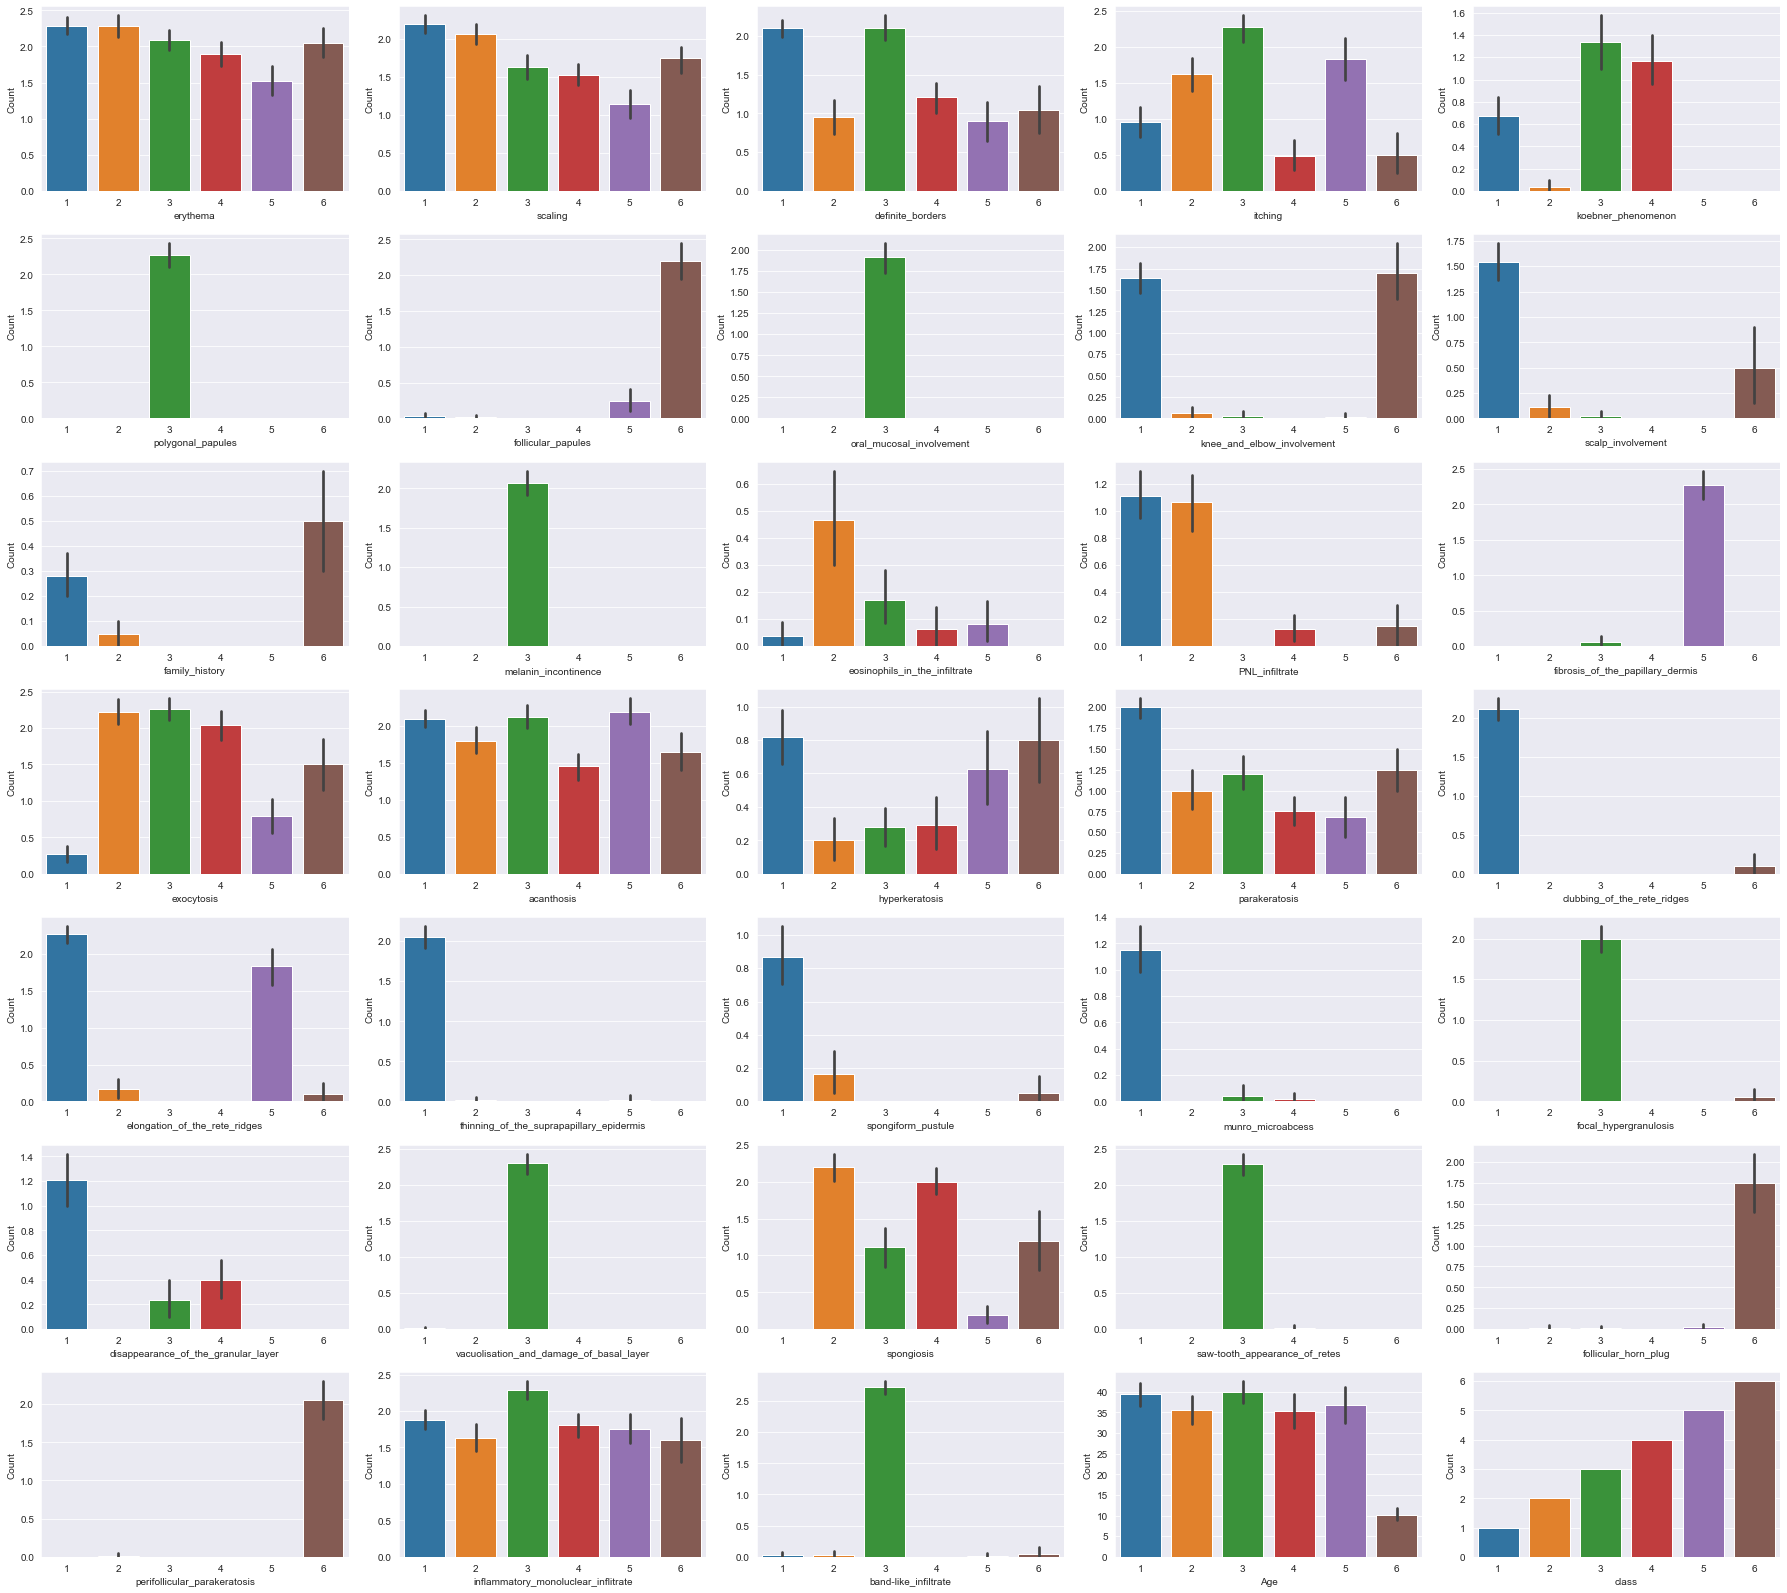

In [30]:
# Count of all features with respect to class

# Setting up the figure size
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=35:
        ax=plt.subplot(8,5,plotnumber)
        sns.barplot(x=df['class'],y=df[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

 - Diesease characteristics that have the greatest impact on Skin Disorder Classes

## Feature Selection

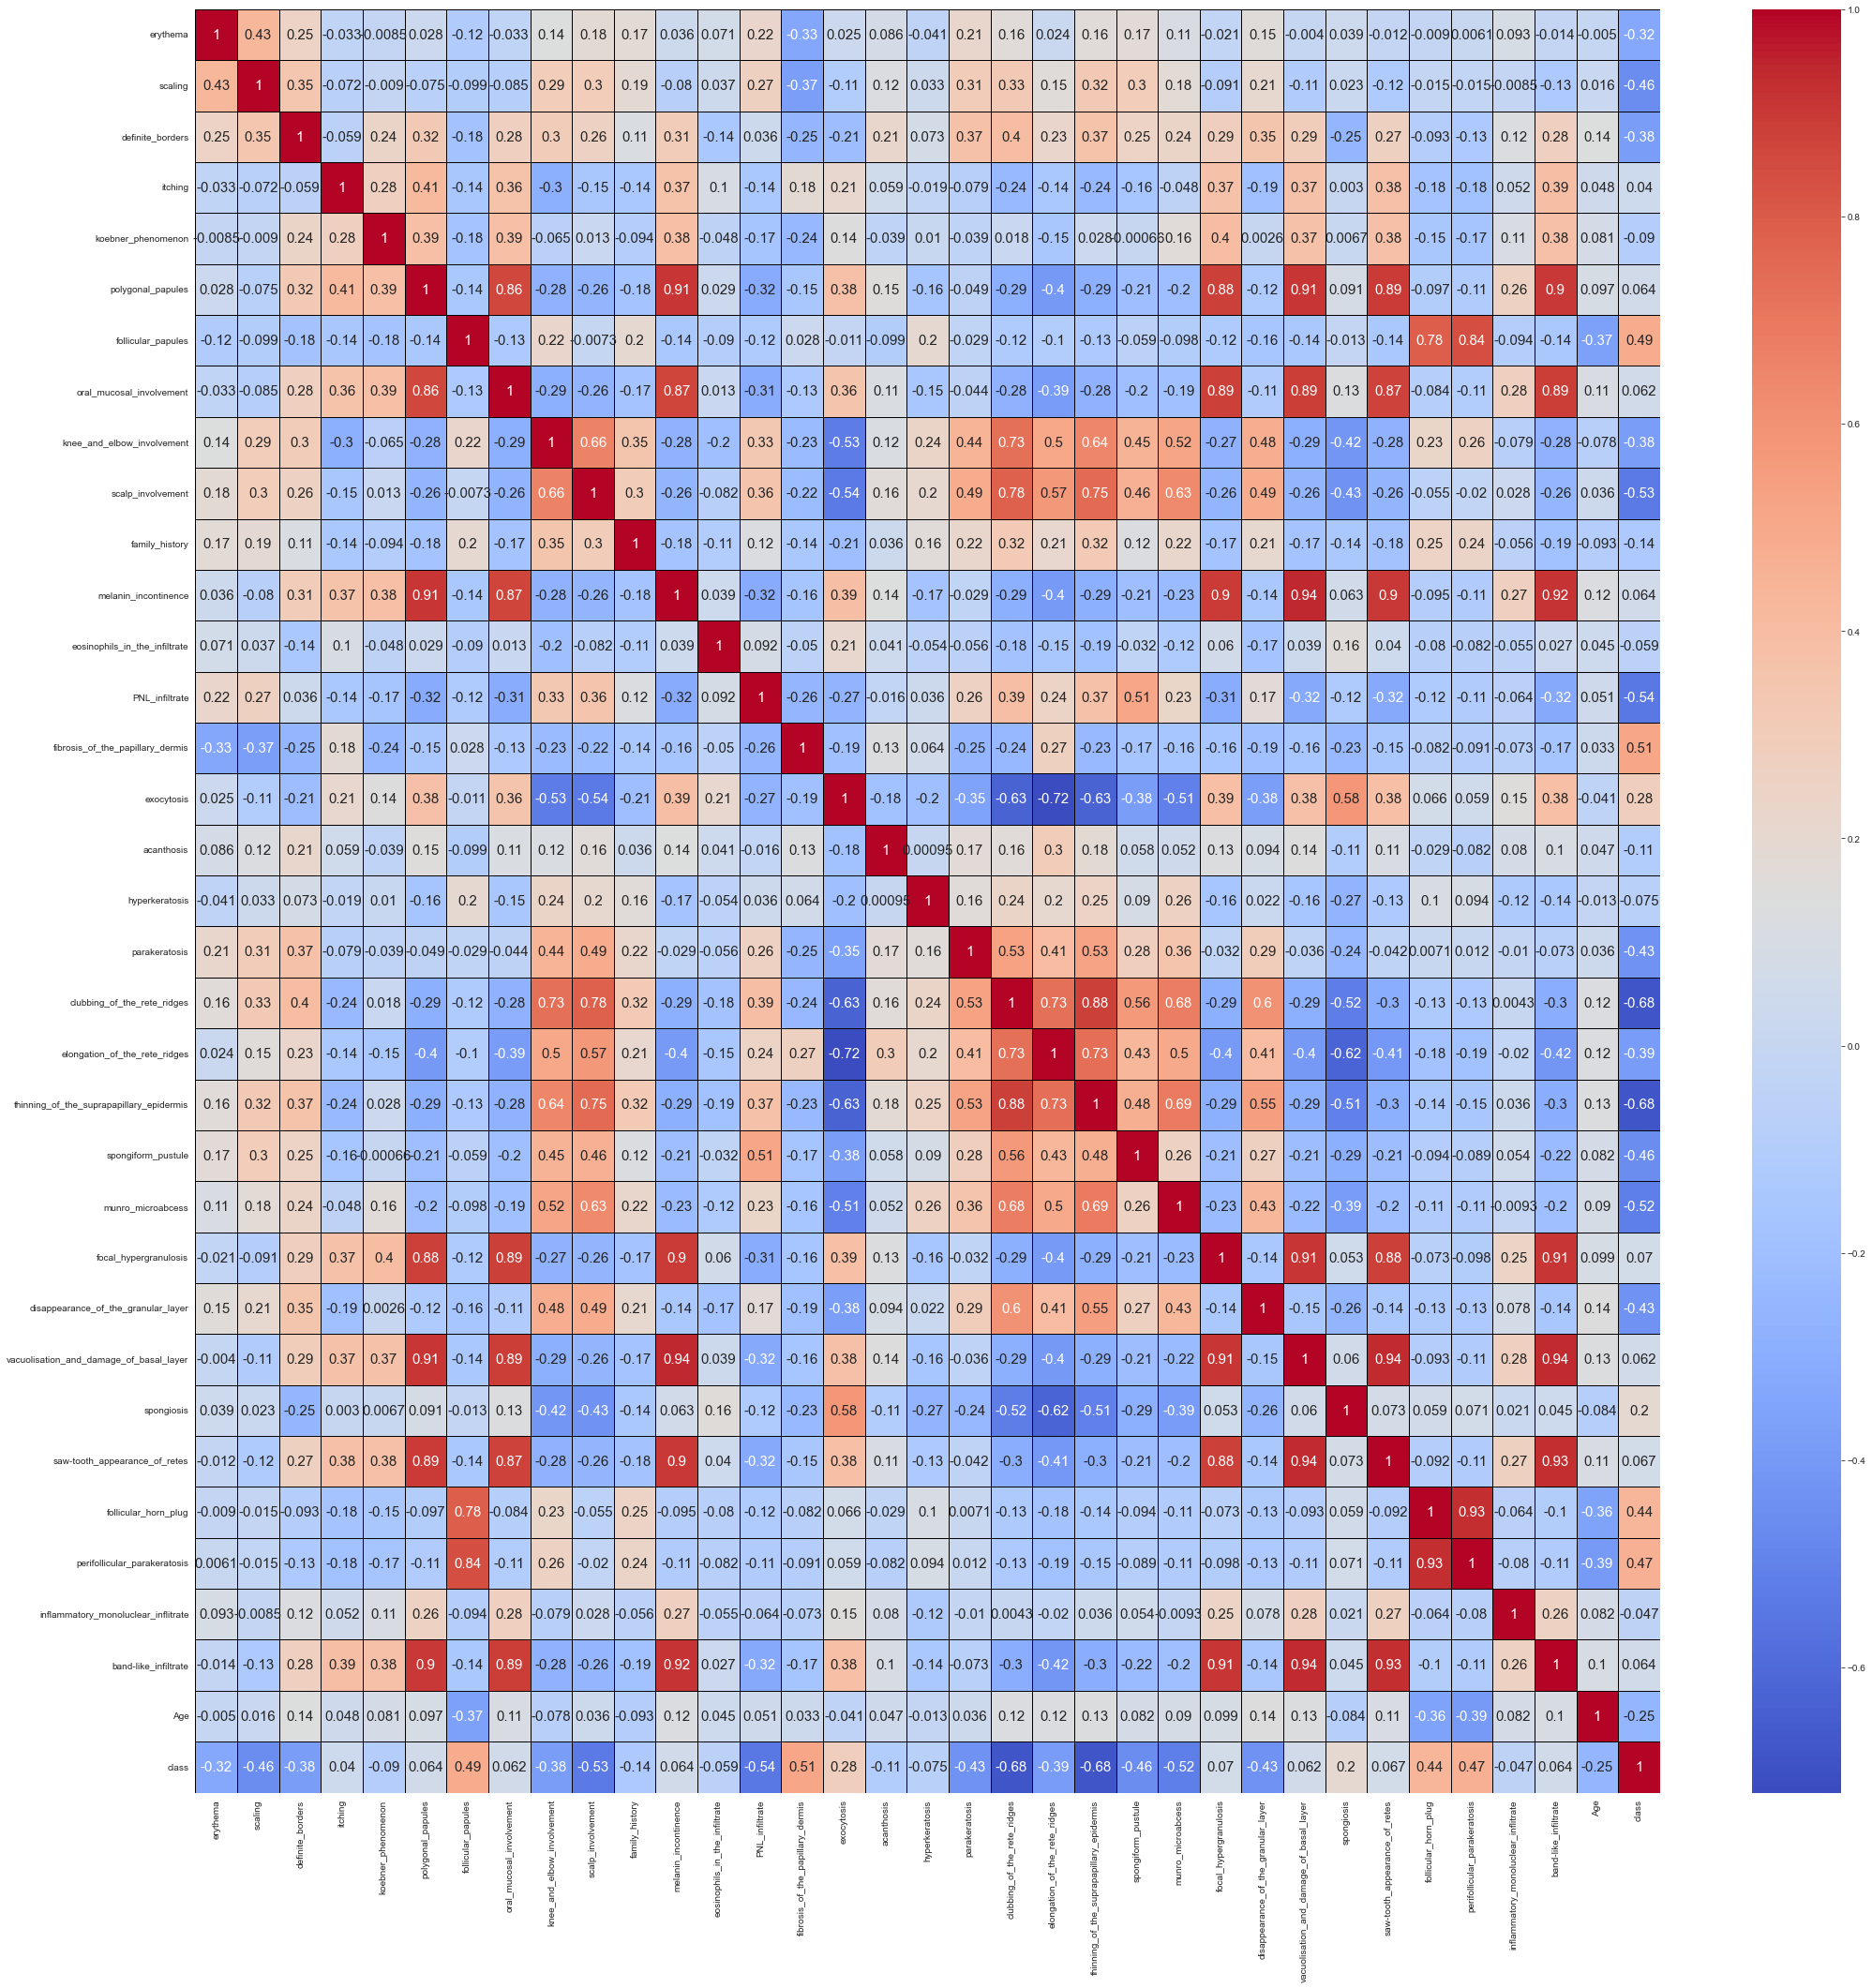

In [31]:
# Using the heatmap to checking for the correlation

# Setting up the figure size
plt.figure(figsize=(35,35))

sns.heatmap(df.corr(),annot=True,cmap='coolwarm',annot_kws={"size":15},linewidths=1,linecolor='black')
plt.show()

- This graph shows the correlation of the data
- We are going to delete the feature where the correlation is more than 9 or more

In [32]:
# Droping the feature 

df.drop(['melanin_incontinence','focal_hypergranulosis','vacuolisation_and_damage_of_basal_layer','saw-tooth_appearance_of_retes','band-like_infiltrate'],axis=1,inplace=True)

- We have droped the feature with has high correlation

[0.00431784 0.0103795  0.01341694 0.02143402 0.0353154  0.08541859
 0.01385826 0.08751278 0.02507061 0.02478239 0.00360188 0.00703389
 0.02289183 0.07209185 0.03524698 0.00513542 0.00424124 0.00427952
 0.07208574 0.05943502 0.05761462 0.00437392 0.01346255 0.01563695
 0.04675765 0.01527573 0.01918453 0.00478937 0.00553149 0.20982349]


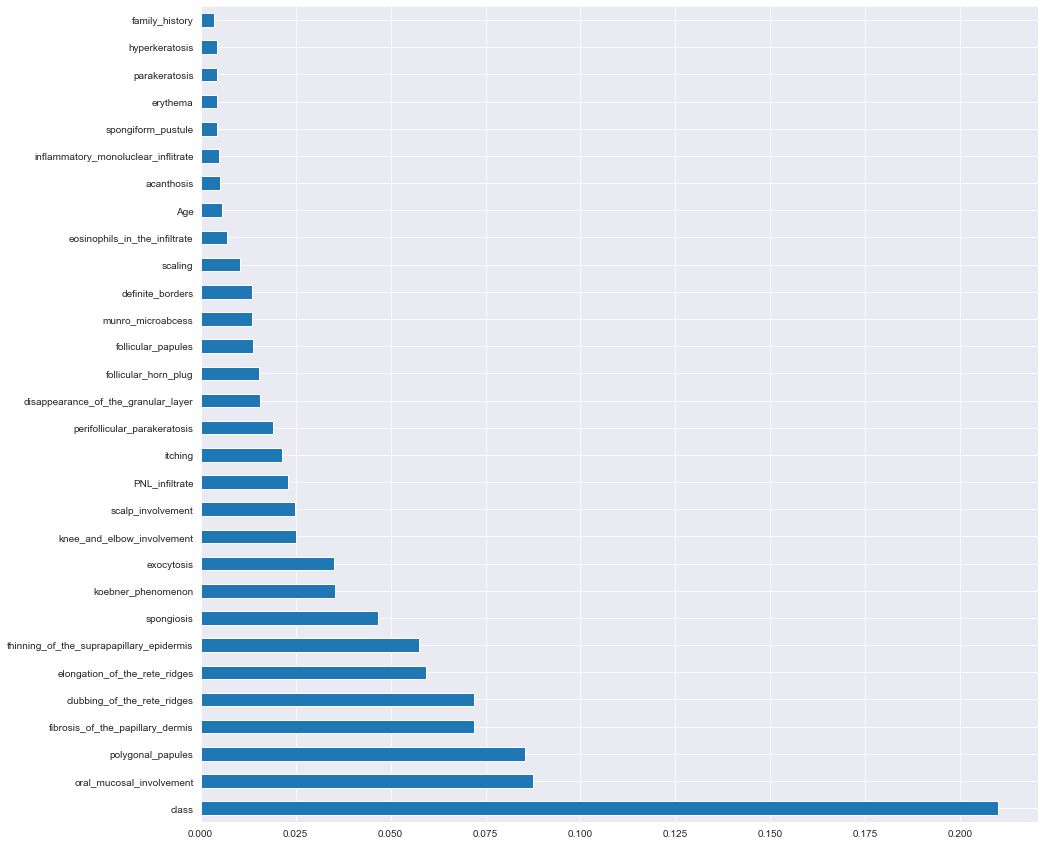

In [33]:
X = df.iloc[:,0:34]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

# Setting up the figure size
plt.figure(figsize=(15,15))

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(34).plot(kind='barh')
plt.show()

- This graph shows the importants of all the features
- Class feature is the very important feature in this data

In [34]:
# Printing all the column from the dataframe

df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'eosinophils_in_the_infiltrate',
       'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis',
       'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'disappearance_of_the_granular_layer',
       'spongiosis', 'follicular_horn_plug', 'perifollicular_parakeratosis',
       'inflammatory_monoluclear_inflitrate', 'Age', 'class'],
      dtype='object')

In [35]:
# rechecking for the shape 

df.shape

(358, 30)

# Train & Test Split

In [36]:
#Spliting dataset into test & train data to train model

X=df.iloc[:,:27]
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=47,test_size=0.3)

 # 1. Logistic Regression

In [37]:
# loading the logistic regression model

logmodel=LogisticRegression()

In [38]:
# fitting the data in the model

logmodel.fit(X_train,y_train)

LogisticRegression()

In [39]:
# predicting the model with the traing  data

logmodel_pred_train=logmodel.predict(X_train)

In [40]:
logmodel_pred_train

array([4, 1, 1, 4, 2, 3, 3, 4, 5, 5, 1, 3, 6, 1, 3, 4, 5, 1, 4, 3, 4, 5,
       5, 5, 5, 3, 6, 4, 6, 3, 5, 3, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       3, 5, 1, 3, 1, 5, 1, 3, 3, 1, 4, 2, 5, 2, 6, 2, 1, 2, 3, 4, 4, 4,
       3, 4, 1, 2, 6, 2, 4, 5, 2, 3, 1, 1, 5, 1, 3, 1, 3, 4, 1, 1, 3, 5,
       1, 4, 1, 1, 2, 3, 2, 1, 3, 5, 1, 5, 1, 3, 3, 3, 1, 3, 1, 4, 1, 3,
       5, 1, 2, 5, 2, 1, 3, 1, 3, 4, 5, 3, 1, 4, 2, 2, 2, 1, 4, 3, 1, 2,
       5, 1, 4, 4, 2, 4, 1, 6, 3, 1, 2, 5, 5, 3, 3, 6, 1, 2, 3, 3, 1, 5,
       1, 1, 1, 5, 1, 3, 5, 1, 6, 6, 3, 4, 1, 4, 3, 2, 3, 1, 1, 2, 6, 2,
       1, 4, 4, 1, 1, 3, 1, 3, 3, 6, 2, 1, 4, 1, 5, 2, 1, 5, 4, 3, 4, 2,
       2, 3, 3, 6, 2, 2, 3, 2, 1, 3, 3, 4, 2, 1, 1, 2, 4, 1, 1, 3, 3, 3,
       5, 1, 2, 5, 5, 1, 1, 3, 1, 1, 1, 4, 2, 1, 5, 5, 1, 3, 2, 2, 4, 3,
       1, 3, 6, 1, 2, 1, 1, 1], dtype=int64)

In [41]:
# predicting the model with the test data

logmodel_pred=logmodel.predict(X_test)

In [42]:
logmodel_pred

array([3, 2, 2, 2, 4, 6, 4, 4, 5, 2, 2, 5, 2, 5, 4, 3, 1, 1, 1, 1, 5, 1,
       4, 5, 2, 3, 1, 4, 4, 1, 1, 2, 3, 2, 6, 5, 1, 4, 5, 6, 5, 1, 1, 5,
       6, 1, 6, 1, 2, 4, 3, 1, 2, 3, 2, 1, 4, 2, 2, 5, 1, 1, 1, 1, 4, 1,
       5, 4, 2, 1, 6, 3, 2, 1, 1, 5, 5, 1, 4, 4, 4, 2, 4, 1, 3, 1, 4, 5,
       1, 2, 3, 6, 1, 3, 1, 1, 4, 1, 1, 1, 4, 5, 5, 3, 3, 2, 2, 1],
      dtype=int64)

In [43]:
# the confusion matrix of the test data

print(confusion_matrix(y_test,logmodel_pred))

[[34  0  0  0  0  0]
 [ 0 19  0  3  0  0]
 [ 0  0 12  2  0  0]
 [ 0  1  0 14  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  7]]


In [44]:
# The classification report of the test data

pd.DataFrame(classification_report(y_test,logmodel_pred,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,1.0,0.950000,1.000000,0.736842,1.0,1.0,0.944444,0.947807,0.953265
recall,1.0,0.863636,0.857143,0.933333,1.0,1.0,0.944444,0.942352,0.944444
f1-score,1.0,0.904762,0.923077,0.823529,1.0,1.0,0.944444,0.941895,0.946118
support,34.0,22.000000,14.000000,15.000000,16.0,7.0,0.944444,108.000000,108.000000


In [45]:
# The accuracy score  of the train data

accuracy_score(logmodel_pred_train,y_train)

1.0

In [46]:
# The accuracy score  of the test data

accuracy_score(logmodel_pred,y_test)

0.9444444444444444

#### ✔️ With test data, we achieved an accuracy of 94%, and with training data, we achieved an accuracy of 100% in Logistic Regression

# 2. K-Nearest Neighbor Algorithm

In [47]:
error_rate = []


for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i,n_jobs=-1,metric='euclidean')
    KNN.fit(X_train, y_train)  
    X_pred = KNN.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,X_pred)) 
    error_rate.append(error) 

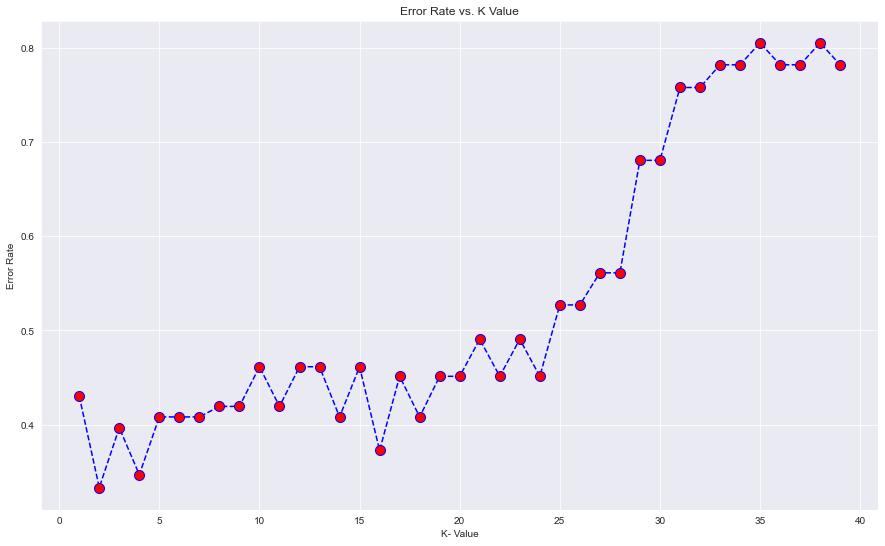

In [48]:
#Plotting the error rate So,that we can choose the value of K using Elbow Method

# Setting up the figure size
plt.figure(figsize=(15,9))

# Setting up the figure size
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)

# Setting tittle for the graph
plt.title('Error Rate vs. K Value')
plt.xlabel('K- Value')
plt.ylabel('Error Rate')
None

In [49]:
# using the grid search cv method to find the best k value

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 1}

- We got 'n_neighbors': 1

In [50]:
# Loading the model

knn=KNeighborsClassifier(n_neighbors=1,n_jobs=-1)

In [51]:
# Loading the data with the model

model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [52]:
# predict the model with train data

knn_pred_train=model.predict(X_train)

In [53]:
knn_pred_train

array([4, 1, 1, 4, 2, 3, 3, 4, 5, 5, 1, 3, 6, 1, 3, 4, 5, 1, 4, 3, 4, 5,
       5, 5, 5, 3, 6, 4, 6, 3, 5, 3, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       3, 5, 1, 3, 1, 5, 1, 3, 3, 1, 4, 2, 5, 2, 6, 2, 1, 2, 3, 4, 4, 4,
       3, 4, 1, 2, 6, 2, 4, 5, 2, 3, 1, 1, 5, 1, 3, 1, 3, 4, 1, 1, 3, 5,
       1, 4, 1, 1, 2, 3, 2, 1, 3, 5, 1, 5, 1, 3, 3, 3, 1, 3, 1, 4, 1, 3,
       5, 1, 2, 5, 2, 1, 3, 1, 3, 4, 5, 3, 1, 4, 2, 2, 2, 1, 4, 3, 1, 2,
       5, 1, 4, 4, 2, 4, 1, 6, 3, 1, 2, 5, 5, 3, 3, 6, 1, 2, 3, 3, 1, 5,
       1, 1, 1, 5, 1, 3, 5, 1, 6, 6, 3, 4, 1, 4, 3, 2, 3, 1, 1, 2, 6, 2,
       1, 4, 4, 1, 1, 3, 1, 3, 3, 6, 2, 1, 4, 1, 5, 2, 1, 5, 4, 3, 4, 2,
       2, 3, 3, 6, 2, 2, 3, 2, 1, 3, 3, 4, 2, 1, 1, 2, 4, 1, 1, 3, 3, 3,
       5, 1, 2, 5, 5, 1, 1, 3, 1, 1, 1, 4, 2, 1, 5, 5, 1, 3, 2, 2, 4, 3,
       1, 3, 6, 1, 2, 1, 1, 1], dtype=int64)

In [54]:
# predict the model with test data

knn_pred=model.predict(X_test)

In [55]:
knn_pred

array([3, 2, 2, 2, 4, 6, 4, 4, 5, 2, 2, 5, 2, 5, 4, 3, 1, 1, 1, 1, 5, 1,
       4, 5, 2, 3, 1, 4, 4, 1, 1, 2, 3, 2, 6, 5, 1, 3, 5, 6, 5, 1, 1, 5,
       6, 1, 6, 1, 4, 3, 3, 1, 2, 3, 4, 1, 4, 2, 2, 5, 1, 1, 1, 1, 4, 1,
       5, 4, 2, 1, 6, 3, 2, 1, 1, 5, 5, 1, 4, 4, 4, 2, 4, 1, 3, 1, 4, 5,
       1, 2, 3, 6, 1, 3, 1, 1, 4, 1, 1, 1, 2, 5, 5, 3, 3, 2, 2, 1],
      dtype=int64)

In [56]:
# the confusion matrix of the test data

print(confusion_matrix(y_test,knn_pred))

[[34  0  0  0  0  0]
 [ 0 18  0  4  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1  0 14  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  7]]


In [57]:
# the classification report of the test data

pd.DataFrame(classification_report(y_test,knn_pred,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,1.0,0.947368,1.0,0.777778,1.0,1.0,0.953704,0.954191,0.958415
recall,1.0,0.818182,1.0,0.933333,1.0,1.0,0.953704,0.958586,0.953704
f1-score,1.0,0.878049,1.0,0.848485,1.0,1.0,0.953704,0.954422,0.954114
support,34.0,22.000000,14.0,15.000000,16.0,7.0,0.953704,108.000000,108.000000


In [58]:
# the accuracy score of the train data

accuracy_score(knn_pred_train,y_train)

1.0

In [59]:
# the accuracy score of the test data

accuracy_score(knn_pred,y_test)

0.9537037037037037

#### ✔️ With test data, we achieved an accuracy of 95%, and with training data, we achieved an accuracy of 100% in K-Nearest Neighbor 

# 3. Support Vector Classification

In [60]:
# loading the model

model=SVC()

In [61]:
# fitting the data into the model

model.fit(X_train,y_train)

SVC()

In [62]:
# predicting the train data

svc_pred_train=model.predict(X_train)

In [63]:
svc_pred_train

array([4, 1, 1, 4, 2, 3, 3, 4, 5, 5, 1, 3, 6, 1, 3, 4, 5, 1, 4, 3, 4, 5,
       5, 5, 5, 3, 6, 4, 6, 3, 5, 3, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       3, 5, 1, 3, 1, 5, 1, 3, 3, 1, 4, 2, 5, 2, 6, 2, 1, 2, 3, 2, 4, 4,
       3, 4, 1, 2, 6, 2, 4, 5, 2, 3, 1, 1, 5, 1, 3, 1, 3, 4, 1, 1, 3, 5,
       1, 4, 1, 1, 2, 3, 2, 1, 3, 5, 1, 5, 1, 3, 3, 3, 1, 3, 1, 4, 1, 3,
       5, 1, 2, 5, 2, 1, 3, 1, 3, 4, 5, 3, 1, 4, 2, 2, 2, 1, 4, 3, 1, 2,
       5, 1, 4, 4, 4, 4, 1, 6, 3, 1, 2, 5, 5, 3, 3, 6, 1, 4, 3, 3, 1, 5,
       1, 1, 1, 5, 1, 3, 5, 1, 6, 6, 3, 4, 1, 4, 3, 2, 3, 1, 1, 2, 6, 2,
       1, 4, 4, 1, 1, 3, 1, 3, 3, 6, 2, 1, 4, 1, 5, 2, 1, 5, 4, 3, 4, 2,
       2, 3, 3, 6, 2, 2, 3, 2, 1, 3, 3, 4, 2, 1, 1, 2, 4, 1, 1, 3, 3, 3,
       5, 1, 2, 5, 5, 1, 1, 3, 1, 1, 1, 4, 2, 1, 5, 5, 1, 3, 2, 2, 4, 3,
       1, 3, 6, 1, 2, 1, 1, 1], dtype=int64)

In [64]:
# predicting the test data

svc_pred=model.predict(X_test)

In [65]:
svc_pred

array([3, 2, 2, 2, 4, 6, 4, 4, 5, 2, 2, 5, 2, 5, 4, 3, 1, 1, 1, 1, 5, 1,
       4, 5, 2, 3, 1, 4, 4, 1, 1, 2, 3, 2, 6, 5, 1, 4, 5, 6, 5, 1, 1, 5,
       6, 1, 6, 1, 2, 4, 3, 1, 2, 3, 4, 1, 4, 2, 2, 5, 1, 1, 1, 1, 4, 1,
       5, 4, 2, 1, 6, 3, 2, 1, 1, 5, 5, 1, 4, 4, 4, 2, 4, 1, 3, 1, 4, 5,
       1, 2, 3, 6, 1, 3, 1, 1, 4, 1, 1, 1, 4, 5, 5, 3, 3, 2, 2, 1],
      dtype=int64)

In [66]:
# the confusion matrix of the test data

print(confusion_matrix(svc_pred,y_test))

[[34  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  3  2 15  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  7]]


In [67]:
# the classification report of the test data

pd.DataFrame(classification_report(svc_pred,y_test,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,1.0,0.863636,0.857143,1.000000,1.0,1.0,0.953704,0.953463,0.960137
recall,1.0,1.000000,1.000000,0.750000,1.0,1.0,0.953704,0.958333,0.953704
f1-score,1.0,0.926829,0.923077,0.857143,1.0,1.0,0.953704,0.951175,0.952125
support,34.0,19.000000,12.000000,20.000000,16.0,7.0,0.953704,108.000000,108.000000


In [68]:
# The accuracy score of the train data

accuracy_score(svc_pred_train,y_train)

0.988

In [69]:
# The accuracy score of the test data

accuracy_score(svc_pred,y_test)

0.9537037037037037

#### ✔️ With test data, we achieved an accuracy of 95%, and with training data, we achieved an accuracy of 98% in Support Vector Classification.

### Using GridSearchCV Method

In [70]:
parameter={
      "C":[0,1,2,3,4,5,6,7,8,9,10],#C=regularization parameter,
  'gamma':[1,0.1,0.01,0.001,0.0001]
}

In [71]:
svc=SVC(kernel='rbf')
cv=GridSearchCV(svc,parameter,verbose=3,)

In [72]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[CV 1/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 2/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 3/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 4/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 5/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 1/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 2/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 3/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 4/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 5/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 1/5] END .....................C=0, gamma=0.01;, score=nan total time=   0.0s
[CV 2/5] END .....................C=0, gamma=0.

[CV 4/5] END ......................C=4, gamma=1;, score=0.340 total time=   0.0s
[CV 5/5] END ......................C=4, gamma=1;, score=0.380 total time=   0.0s
[CV 1/5] END ....................C=4, gamma=0.1;, score=0.980 total time=   0.0s
[CV 2/5] END ....................C=4, gamma=0.1;, score=0.980 total time=   0.0s
[CV 3/5] END ....................C=4, gamma=0.1;, score=0.920 total time=   0.0s
[CV 4/5] END ....................C=4, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=4, gamma=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END ...................C=4, gamma=0.01;, score=0.980 total time=   0.0s
[CV 2/5] END ...................C=4, gamma=0.01;, score=0.960 total time=   0.0s
[CV 3/5] END ...................C=4, gamma=0.01;, score=0.940 total time=   0.0s
[CV 4/5] END ...................C=4, gamma=0.01;, score=1.000 total time=   0.0s
[CV 5/5] END ...................C=4, gamma=0.01;, score=1.000 total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END ....................C=8, gamma=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END ...................C=8, gamma=0.01;, score=0.980 total time=   0.0s
[CV 2/5] END ...................C=8, gamma=0.01;, score=0.960 total time=   0.0s
[CV 3/5] END ...................C=8, gamma=0.01;, score=0.920 total time=   0.0s
[CV 4/5] END ...................C=8, gamma=0.01;, score=1.000 total time=   0.0s
[CV 5/5] END ...................C=8, gamma=0.01;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=8, gamma=0.001;, score=0.980 total time=   0.0s
[CV 2/5] END ..................C=8, gamma=0.001;, score=0.980 total time=   0.0s
[CV 3/5] END ..................C=8, gamma=0.001;, score=0.920 total time=   0.0s
[CV 4/5] END ..................C=8, gamma=0.001;, score=1.000 total time=   0.0s
[CV 5/5] END ..................C=8, gamma=0.001;, score=1.000 total time=   0.0s
[CV 1/5] END .................C=8, gamma=0.0001;, score=0.520 total time=   0.0s
[CV 2/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [73]:
#To view the best paramter obtained by Hyperparameter Tunning

cv.best_params_

{'C': 3, 'gamma': 0.01}

- we got  c=9 and gamma = 0.001

In [74]:
svc1 = SVC(kernel="rbf",C=9,gamma=0.001)

# Fit the data with the model
svc1.fit(X_train,y_train)

SVC(C=9, gamma=0.001)

In [75]:
#Prediction for test and train models

svc1_pred_train = svc1.predict(X_train)
svc1_pred = svc1.predict(X_test)

In [76]:
# the confusion matrix of the test data

print(confusion_matrix(y_test,svc1_pred))

[[34  0  0  0  0  0]
 [ 0 19  0  3  0  0]
 [ 0  0 12  2  0  0]
 [ 0  1  0 14  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  7]]


In [77]:
# the classification report of the test data

pd.DataFrame(classification_report(y_test,svc1_pred,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,1.0,0.950000,1.000000,0.736842,1.0,1.0,0.944444,0.947807,0.953265
recall,1.0,0.863636,0.857143,0.933333,1.0,1.0,0.944444,0.942352,0.944444
f1-score,1.0,0.904762,0.923077,0.823529,1.0,1.0,0.944444,0.941895,0.946118
support,34.0,22.000000,14.000000,15.000000,16.0,7.0,0.944444,108.000000,108.000000


In [78]:
# the accuracy score of the train data

accuracy_score(svc1_pred_train,y_train)

0.988

In [79]:
# the accuracy score of the test data

accuracy_score(y_test,svc1_pred)

0.9444444444444444

#### ✔️ With test data, we achieved an accuracy of 94%, and with training data, we achieved an accuracy of 98% in GridSearchCV 

# 4 .Random Forest

In [80]:
# Load the model

modle=RandomForestClassifier()

In [81]:
# fit the data into the model

model.fit(X_train,y_train)

SVC()

In [82]:
# predict model with the train data

rfc_pred_train=model.predict(X_train)

In [83]:
rfc_pred_train

array([4, 1, 1, 4, 2, 3, 3, 4, 5, 5, 1, 3, 6, 1, 3, 4, 5, 1, 4, 3, 4, 5,
       5, 5, 5, 3, 6, 4, 6, 3, 5, 3, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       3, 5, 1, 3, 1, 5, 1, 3, 3, 1, 4, 2, 5, 2, 6, 2, 1, 2, 3, 2, 4, 4,
       3, 4, 1, 2, 6, 2, 4, 5, 2, 3, 1, 1, 5, 1, 3, 1, 3, 4, 1, 1, 3, 5,
       1, 4, 1, 1, 2, 3, 2, 1, 3, 5, 1, 5, 1, 3, 3, 3, 1, 3, 1, 4, 1, 3,
       5, 1, 2, 5, 2, 1, 3, 1, 3, 4, 5, 3, 1, 4, 2, 2, 2, 1, 4, 3, 1, 2,
       5, 1, 4, 4, 4, 4, 1, 6, 3, 1, 2, 5, 5, 3, 3, 6, 1, 4, 3, 3, 1, 5,
       1, 1, 1, 5, 1, 3, 5, 1, 6, 6, 3, 4, 1, 4, 3, 2, 3, 1, 1, 2, 6, 2,
       1, 4, 4, 1, 1, 3, 1, 3, 3, 6, 2, 1, 4, 1, 5, 2, 1, 5, 4, 3, 4, 2,
       2, 3, 3, 6, 2, 2, 3, 2, 1, 3, 3, 4, 2, 1, 1, 2, 4, 1, 1, 3, 3, 3,
       5, 1, 2, 5, 5, 1, 1, 3, 1, 1, 1, 4, 2, 1, 5, 5, 1, 3, 2, 2, 4, 3,
       1, 3, 6, 1, 2, 1, 1, 1], dtype=int64)

In [84]:
# predict model with the test data

rfc_pred=model.predict(X_test)

In [85]:
rfc_pred

array([3, 2, 2, 2, 4, 6, 4, 4, 5, 2, 2, 5, 2, 5, 4, 3, 1, 1, 1, 1, 5, 1,
       4, 5, 2, 3, 1, 4, 4, 1, 1, 2, 3, 2, 6, 5, 1, 4, 5, 6, 5, 1, 1, 5,
       6, 1, 6, 1, 2, 4, 3, 1, 2, 3, 4, 1, 4, 2, 2, 5, 1, 1, 1, 1, 4, 1,
       5, 4, 2, 1, 6, 3, 2, 1, 1, 5, 5, 1, 4, 4, 4, 2, 4, 1, 3, 1, 4, 5,
       1, 2, 3, 6, 1, 3, 1, 1, 4, 1, 1, 1, 4, 5, 5, 3, 3, 2, 2, 1],
      dtype=int64)

In [86]:
# the confusion matrix of the test data

print(confusion_matrix(y_test,rfc_pred))

[[34  0  0  0  0  0]
 [ 0 19  0  3  0  0]
 [ 0  0 12  2  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  7]]


In [87]:
# classification report of the test data

pd.DataFrame(classification_report(y_test,rfc_pred,output_dict=True))

,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,1.0,1.000000,1.000000,0.750000,1.0,1.0,0.953704,0.958333,0.965278
recall,1.0,0.863636,0.857143,1.000000,1.0,1.0,0.953704,0.953463,0.953704
f1-score,1.0,0.926829,0.923077,0.857143,1.0,1.0,0.953704,0.951175,0.955282
support,34.0,22.000000,14.000000,15.000000,16.0,7.0,0.953704,108.000000,108.000000


In [88]:
# the accuracy of the train data

accuracy_score(rfc_pred_train,y_train)

0.988

In [89]:
# the accuracy of the test data

accuracy_score(y_test,rfc_pred)

0.9537037037037037

#####  ✔️ With test data, we achieved an accuracy of 95%, and with training data, we achieved an accuracy of 98% in 

 ## MODEL COMPARISION
 

In [90]:
x=PrettyTable()

In [91]:
x.field_names = ["Model",'(Test)Accuracy','(Train)Accuracy' ]
x.add_row(["Logistic Regression",'94 %','100 %'])
x.add_row(["K-Nearest Neighbor", '95 %','100 %'])
x.add_row(["Support Vector Classifier",'95 %','98 %'])
x.add_row(["Support Vector Classifier using GridsearchCV",'94 %','98 %'])
x.add_row(["Random Forest", '95 %','98 %'])


In [92]:
print(x)

+----------------------------------------------+----------------+-----------------+
|                    Model                     | (Test)Accuracy | (Train)Accuracy |
+----------------------------------------------+----------------+-----------------+
|             Logistic Regression              |      94 %      |      100 %      |
|              K-Nearest Neighbor              |      95 %      |      100 %      |
|          Support Vector Classifier           |      95 %      |       98 %      |
| Support Vector Classifier using GridsearchCV |      94 %      |       98 %      |
|                Random Forest                 |      95 %      |       98 %      |
+----------------------------------------------+----------------+-----------------+


# Conclusion

Many different machine learning methods are applied in the diagnosis of erythema squamous skin diseases. Each method classifies disease withreasonable accuracy.<br>

Clinical and histopathological data obtained from the patient are used in the diagnosis of the disease. The specialist doctor uses these data tomake the most appropriate diagnosis decision for the patient. With the experience of the medical profession, the specialist physician can decidewhether the erroneous data is compatible with the relevant disease and can eliminate the erroneous values.<br>

Outlier values in the data set cause incorrect rates to be obtained in the results of the applied classification method.
Outlier data were removed from the dataset in order to obtain a classification result that fully reflects the clinical and histopathological features of
the diseases.<br>
As a result, machine learning classification rates have been successfully achieved.
<ul>
<li>Accuracy of Logistic Regression 0.9444444444444444
<li>Accuracy of K-Nearest Neighbor 0.9537037037037037
<li>Accuracy of Support Vector Machine0.9444444444444444
 <li>Accuracy of Random Forest 0.9537037037037037
</ul>
 <b>Based on the observations above, we can conclude that Random Forest  is the best-fitting model With the test data, we achieved an accuracy of 95%, and with training data, we achieved an accuracy of 98% 